In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns


In [4]:
mnist=tf.keras.datasets.mnist


In [5]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [6]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [7]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full[5000]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

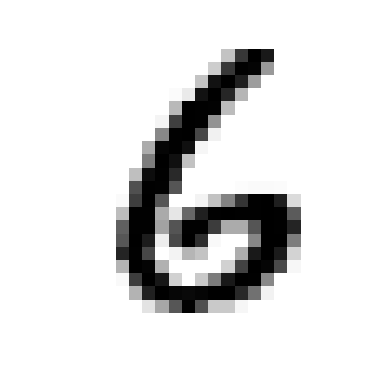

In [10]:
plt.imshow(X_train_full[6000],cmap='binary')
plt.axis('off')
plt.show()

<Axes: >

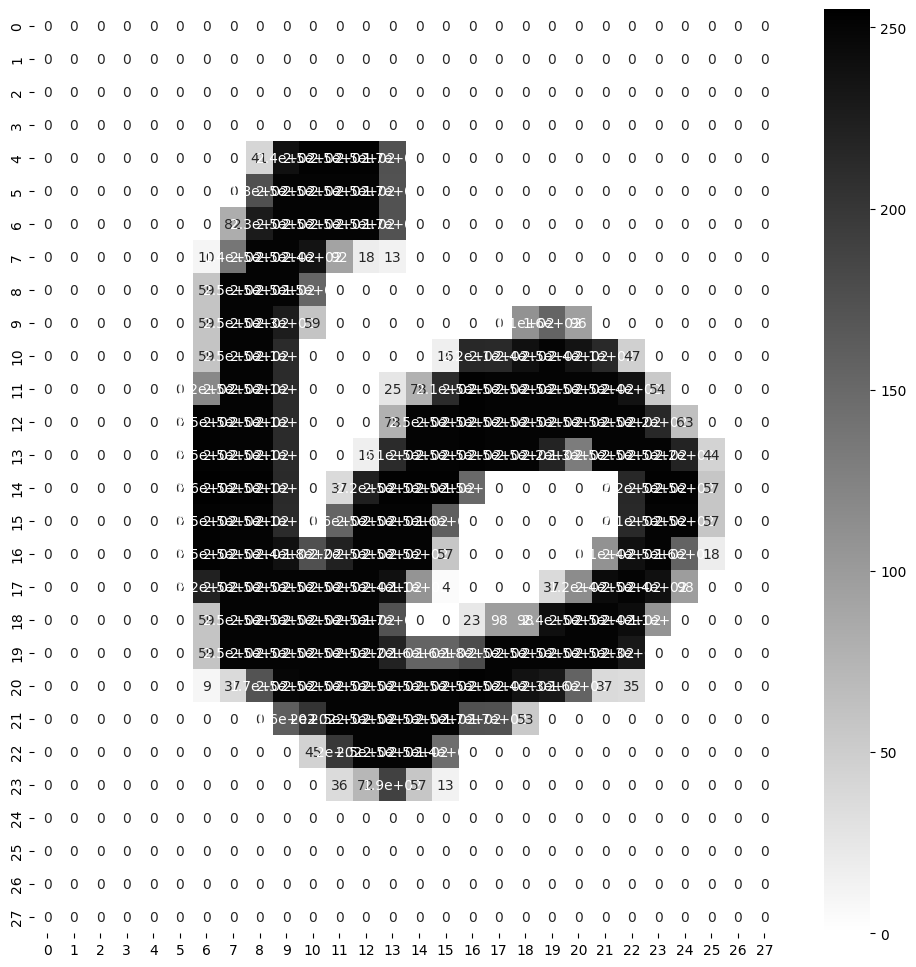

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(X_train_full[9000],annot=True,cmap="binary")


In [12]:
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid,X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

In [13]:
# Scale the test set as well
X_test = X_test/255.


In [14]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


<Axes: >

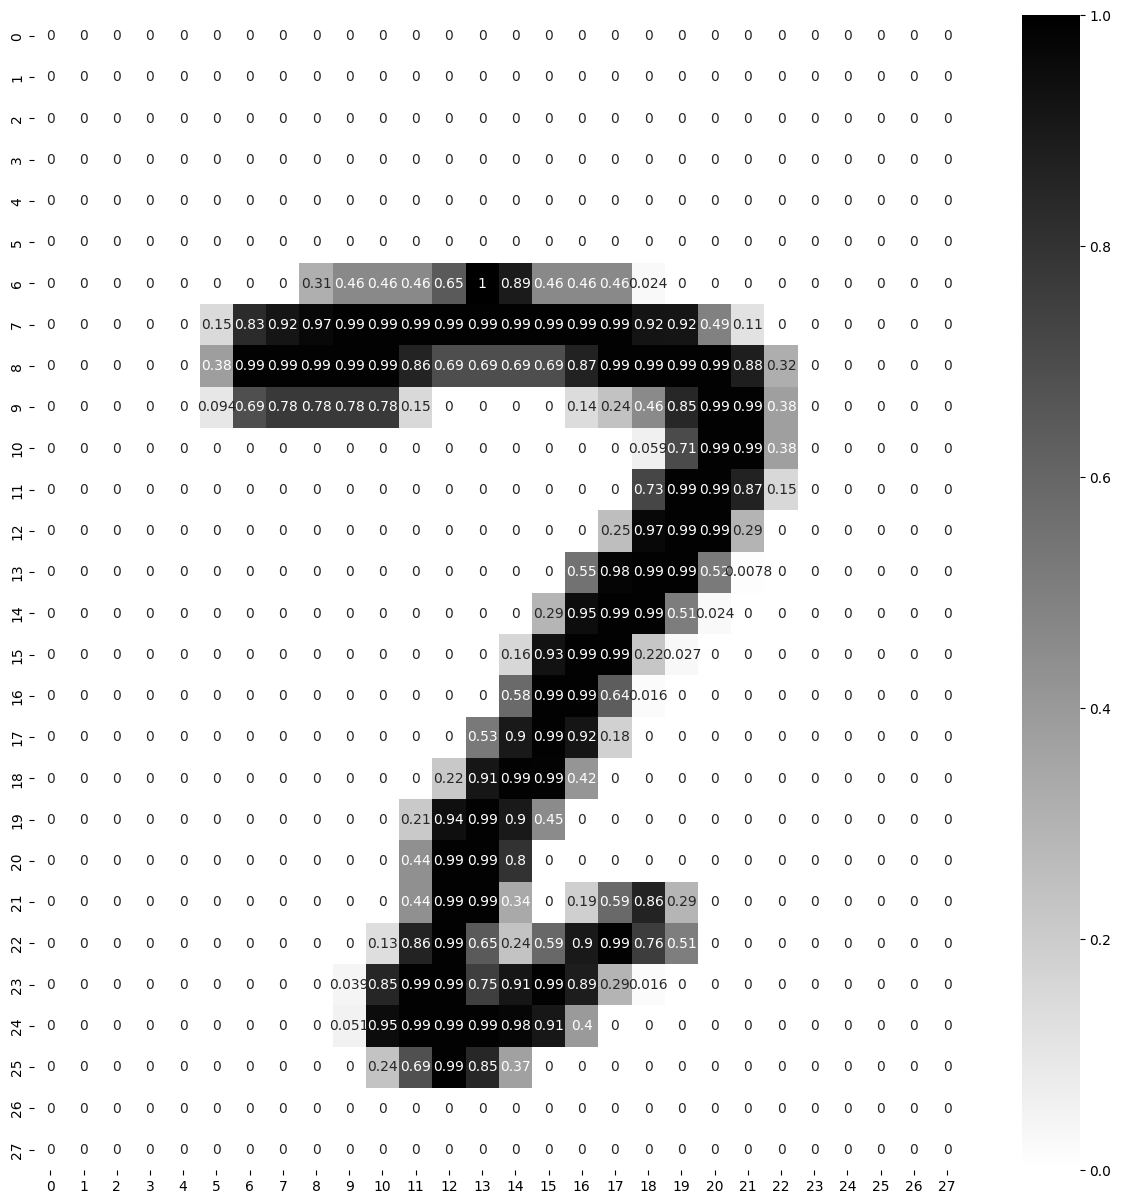

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[7000],annot=True,cmap="binary")

In [16]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
          tf.keras.layers.Dense(300,activation="relu",name="hiddenlayer1"),
          tf.keras.layers.Dense(100,activation = "relu",name="hiddenlayer2"),
          tf.keras.layers.Dense(10,activation="softmax",name="outputlayer")]

In [17]:
model_clf=tf.keras.models.Sequential(LAYERS)

In [18]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "ADAM"
METRICS = ["accuracy"]

In [20]:
model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics = METRICS)

In [21]:
model_clf.layers[1].name

'hiddenlayer1'

In [22]:
hidden1 = model_clf.layers[1]

In [23]:
weights,biases=hidden1.get_weights()

In [24]:
print(X_valid)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [25]:
print(y_valid)

[5 0 4 ... 2 1 2]


In [26]:
EPOCHS = 5
VALIDATION_SET = (X_valid,y_valid)
history = model_clf.fit(X_train,y_train,epochs=EPOCHS, validation_data = VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 12s 4ms/step - loss: 0.2151 - accuracy: 0.9353 - val_loss: 0.1155 - val_accuracy: 0.9666
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0882 - accuracy: 0.9719 - val_loss: 0.0816 - val_accuracy: 0.9778
Epoch 3/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0560 - accuracy: 0.9825 - val_loss: 0.0774 - val_accuracy: 0.9752
Epoch 4/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0446 - accuracy: 0.9852 - val_loss: 0.0731 - val_accuracy: 0.9792
Epoch 5/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0342 - accuracy: 0.9892 - val_loss: 0.0674 - val_accuracy: 0.9794


In [27]:
import time
import os

def saveModel_path(model_dir = "/content/SAVED_MODELS/"):
  os.makedirs(model_dir, exist_ok = True)
  fileName = time.strftime("Model_%Y_%m_%d_%H,%M_%S_.h5")
  model_path = os.path.join(model_dir,fileName)
  print(f"your model will be saved at the following location \n{model_path}")
  return model_path


In [28]:
model_clf.save(saveModel_path())

your model will be saved at the following location 
/content/SAVED_MODELS/Model_2023_09_30_15,49_52_.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [31]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.215142,0.935327,0.115496,0.9666
1,0.088190,0.971855,0.081564,0.9778
2,0.056034,0.982509,0.077437,0.9752
3,0.044571,0.985236,0.073075,0.9792
4,0.034173,0.989182,0.067418,0.9794


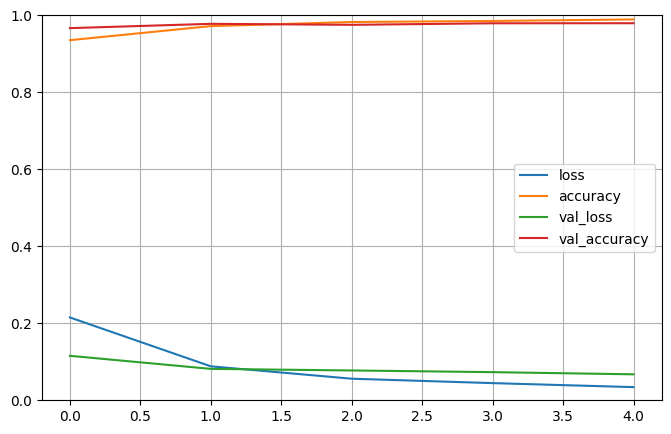

In [34]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [35]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0789 - accuracy: 0.9778


[0.0788787379860878, 0.9778000116348267]

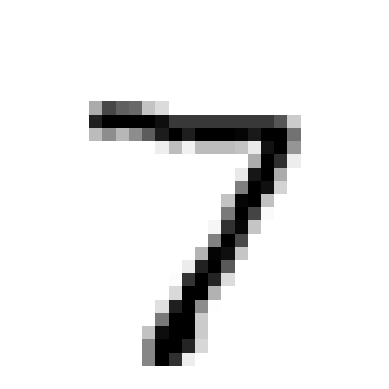

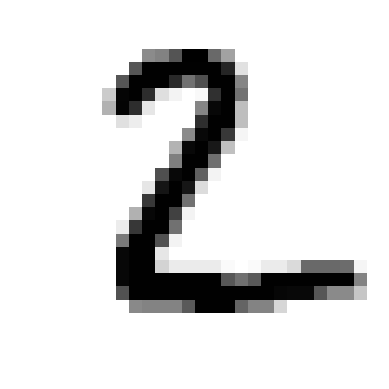

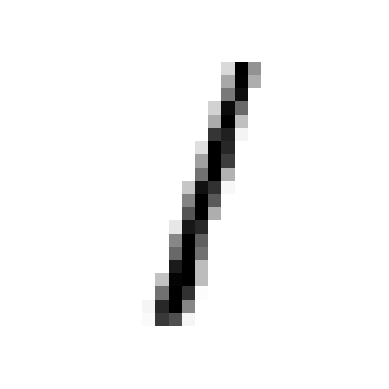

In [39]:
for i in range(0,3):
  #print(i)
  plt.imshow(X_test[i],cmap='binary')
  plt.axis("off")
  plt.show()


In [41]:
prediction= model_clf.predict(X_test[:3])

1/1 [==============================] - 0s 18ms/step


In [42]:
prediction

array([[3.7362491e-09, 8.6263685e-07, 2.8449253e-06, 1.5043527e-05,
        2.9856156e-10, 4.3478082e-10, 2.5635891e-11, 9.9998093e-01,
        3.0551077e-09, 3.8189870e-07],
       [8.6897340e-14, 2.8786715e-08, 1.0000000e+00, 6.3386696e-10,
        8.0158506e-15, 3.0879565e-16, 6.3549354e-15, 3.7454402e-12,
        3.6558868e-12, 1.9270622e-18],
       [4.4163432e-08, 9.9959654e-01, 4.1118259e-05, 1.4907833e-07,
        6.4824612e-06, 1.3473331e-07, 4.1048925e-06, 1.3074723e-04,
        2.1902911e-04, 1.7644320e-06]], dtype=float32)

In [51]:
y_prob = prediction[0]

In [52]:
y_prob.round(5)

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e-05, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 9.9998e-01, 0.0000e+00, 0.0000e+00],
      dtype=float32)

In [53]:
np.argmax(y_prob.round(5))

7

In [ ]:
model_clf.predict(X_test)

In [ ]:
# To load a model
from tf.keras.models import load_model
model = load_model("Model_2023_09_30_15,49_52_.h5")